In [1]:
import os
import numpy as np
caffe_root = '/home/flathead/bitbucket/mycaffe/'
os.chdir('../../')
import sys
sys.path.insert(0, 'python')
import caffe

In [2]:
from pylab import *
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from numpy.random import normal

In [4]:
caffe.set_mode_gpu()
caffe.set_device(0)

In [5]:
#solver = caffe.SGDSolver('examples/cifar10/test/cifar10_full_solver.prototxt')
solver = None  # ignore this workaround for lmdb data (can't instantiate two solvers on the same data)
solver = caffe.SGDSolver('examples/mlp/mlp_solver.prototxt')
#net1 = caffe.Net('examples/mlp/mlp_train_test.prototxt','examples/mlp/mlp_test_iter_50000.caffemodel', caffe.TEST)

In [6]:
net1 = solver.net
test_net = solver.test_nets[0]

In [7]:
# during training, each output is (batch size, feature dim, spatial dim)
[(k, v.data.shape) for k, v in net1.blobs.items()]

[('data', (100, 1, 28, 28)),
 ('label', (100,)),
 ('ip1', (100, 20)),
 ('ip2', (100, 50)),
 ('ip3', (100, 10)),
 ('loss', ())]

In [8]:
# just print the weight sizes (we'll omit the biases)
[(k, v[0].data.shape) for k, v in net1.params.items()]

[('ip1', (20, 784)), ('ip2', (50, 20)), ('ip3', (10, 50))]

In [9]:
net1.forward()

{'loss': array(2.322340726852417, dtype=float32)}

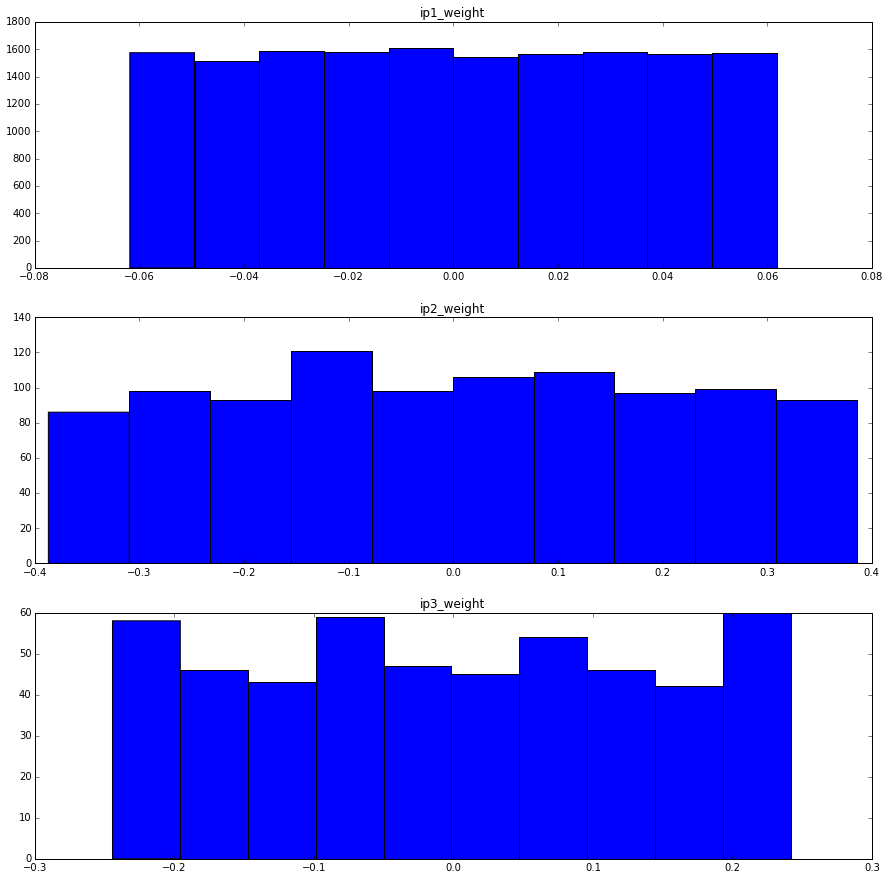

In [10]:
plt.figure(figsize=(15, 15))

feat1 = net1.params['ip1'][0].data
feat2 = net1.params['ip2'][0].data
feat3 = net1.params['ip3'][0].data
#feat4 = net1.params['ip4'][0].data

plt.subplot(311)
#plt.hist(train_net.params['ip1'][0].data)
plt.hist(feat1.flat)
plt.title("ip1_weight")

#plt.xlabel("weight")
plt.subplot(312)
#plt.hist(train_net.params['ip2'][0].data)
plt.hist(feat2.flat)
plt.title("ip2_weight")

plt.subplot(313)
#plt.hist(train_net.params['ip3'][0].data)
plt.hist(feat3.flat)
plt.title("ip3_weight")

#plt.subplot(2, 2, 4)
#plt.hist(train_net.params['ip4'][0].data)
#plt.hist(feat4)
#plt.title("ip4_weight")

#plt.subplot_tool()
plt.show()

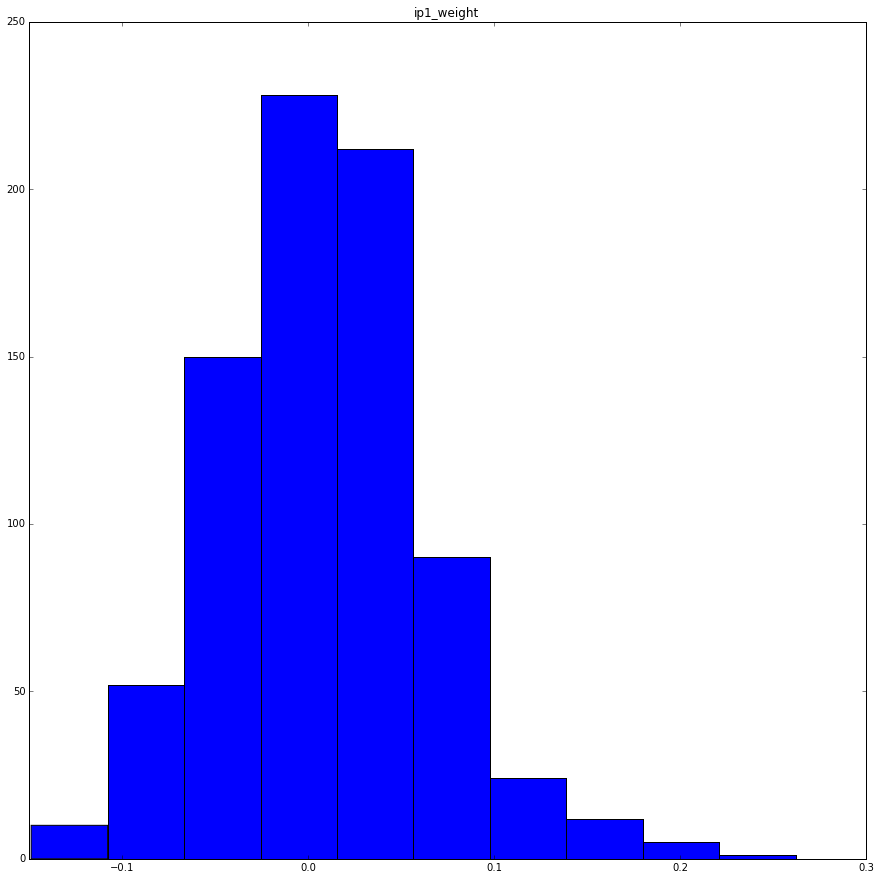

In [44]:
plt.figure(figsize=(15, 15))

abc = net1.params['ip1'][0].data[1]
plt.hist(abc)
plt.title("ip1_weight")


In [18]:
std_feat1 = feat1.std()
mean_feat1 = feat1.mean()
posm_feat1 = net1.params['ip1'][0].data[feat1 > 0].mean()
negm_feat1 = net1.params['ip1'][0].data[feat1 < 0].mean()
print "std_feat1 = ", std_feat1
print "mean_feat1 = ", mean_feat1
print "posm_feat1 = ", posm_feat1
print "negm_feat1 = ", negm_feat1
std_feat2 = feat2.std()
mean_feat2 = feat2.mean()
posm_feat2 = feat2[feat2 > 0].mean()
negm_feat2 = feat2[feat2 < 0].mean()
print "std_feat2 = ", std_feat2
print "mean_feat2 = ", mean_feat2
print "posm_feat2 = ", posm_feat2
print "negm_feat2 = ", negm_feat2
std_feat3 = feat3.std()
mean_feat3 = feat3.mean()
print "std_feat3 = ", std_feat3
print "mean_feat3 = ", mean_feat3
#std_feat4 = feat4.std()
#mean_feat4 = feat4.mean()
#print "std_feat4 = ", std_feat4
#print "mean_feat4 = ", mean_feat4

std_feat1 =  0.0356375
mean_feat1 =  7.7138e-05
posm_feat1 =  0.0310342
negm_feat1 =  -0.0307067
std_feat2 =  0.217305
mean_feat2 =  0.000860002
posm_feat2 =  0.186721
negm_feat2 =  -0.187245
std_feat3 =  0.143218
mean_feat3 =  -0.00199879


In [75]:
%%time
niter = 5000
test_interval = 200
train_loss = zeros(niter)
test_acc = zeros(int(np.ceil(niter / test_interval)))
output = zeros((niter, 8, 10))

for it in range(niter):
    solver.step(1)
    #net1.forward()
    
    train_loss[it] = net1.blobs['loss'].data
    
    net1.forward(start='ip1')
    output[it] = test_net.blobs['ip3'].data[:8]
    
    if it % test_interval == 0:
        print 'iteration', it, 'testing...'
        correct = 0
        for test_it in range(100):
            test_net.forward()
            correct += sum(test_net.blobs['ip3'].data.argmax(1) == test_net.blobs['label'].data)
        test_acc[it // test_interval] = correct / 1e4

iteration 0 testing...
iteration 200 testing...
iteration 400 testing...
iteration 600 testing...
iteration 800 testing...
iteration 1000 testing...
iteration 1200 testing...
iteration 1400 testing...
iteration 1600 testing...
iteration 1800 testing...
iteration 2000 testing...
iteration 2200 testing...
iteration 2400 testing...
iteration 2600 testing...
iteration 2800 testing...
iteration 3000 testing...
iteration 3200 testing...
iteration 3400 testing...
iteration 3600 testing...
iteration 3800 testing...
iteration 4000 testing...
iteration 4200 testing...
iteration 4400 testing...
iteration 4600 testing...
iteration 4800 testing...
CPU times: user 12 s, sys: 1.98 s, total: 14 s
Wall time: 6.23 s


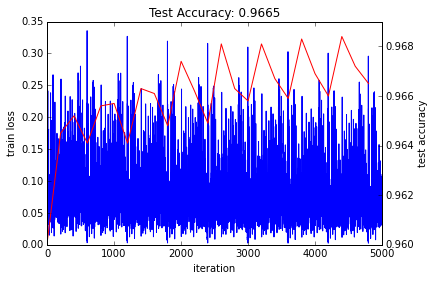

In [76]:
_, ax1 = subplots()
ax2 = ax1.twinx()
ax1.plot(arange(niter), train_loss)
ax2.plot(test_interval * arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_title('Test Accuracy: {:.4f}'.format(test_acc[-1]))

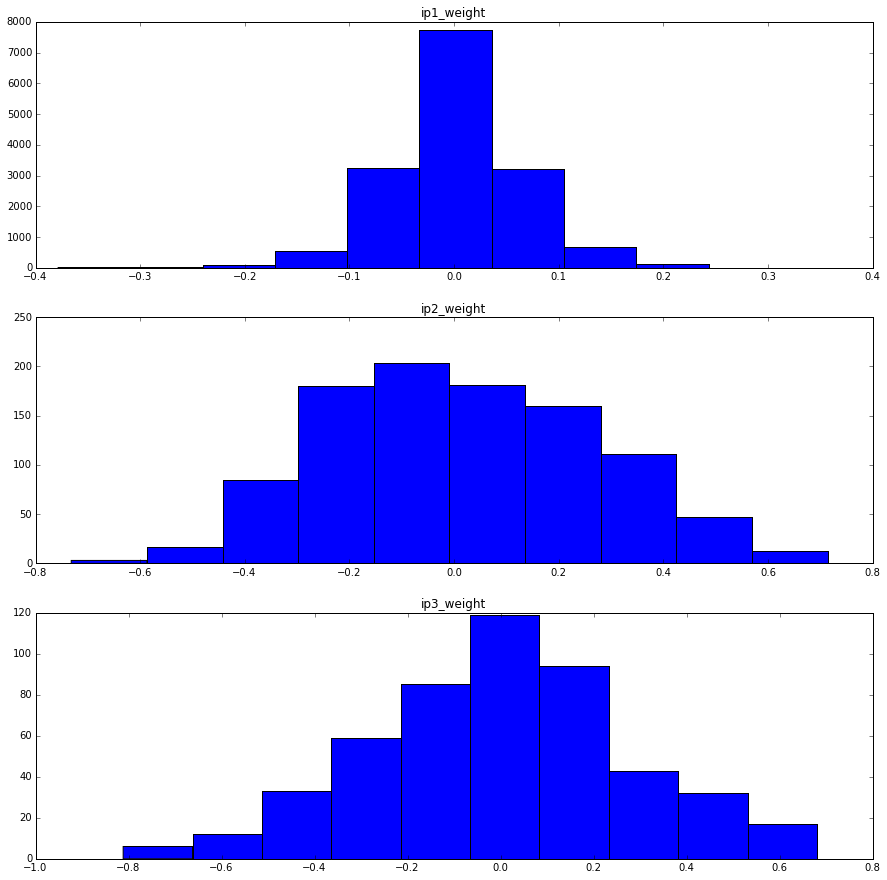

In [21]:
plt.figure(figsize=(15, 15))

feat1 = net1.params['ip1'][0].data
feat2 = net1.params['ip2'][0].data
feat3 = net1.params['ip3'][0].data
#feat4 = net1.params['ip4'][0].data

plt.subplot(311)
#plt.hist(train_net.params['ip1'][0].data)
plt.hist(feat1.flat)
plt.title("ip1_weight")

#plt.xlabel("weight")
plt.subplot(312)
#plt.hist(train_net.params['ip2'][0].data)
plt.hist(feat2.flat)
plt.title("ip2_weight")

plt.subplot(313)
#plt.hist(train_net.params['ip3'][0].data)
plt.hist(feat3.flat)
plt.title("ip3_weight")

#plt.subplot(2, 2, 4)
#plt.hist(train_net.params['ip4'][0].data)
#plt.hist(feat4)
#plt.title("ip4_weight")

#plt.subplot_tool()
plt.show()

In [77]:
#Neurons of Layer 1
mean_feat1 = [0] * 20
std_feat1 = [0] * 20
posm_feat1 = [0] * 20
negm_feat1 = [0] * 20
poss_feat1 = [0] * 20
negs_feat1 = [0] * 20

for j in range(20):
    mean_feat1[j] = feat1[j].mean()
    std_feat1[j] = feat1[j].std()
    posm_feat1[j] = feat1[j][feat1[j] > 0].mean()
    negm_feat1[j] = feat1[j][feat1[j] < 0].mean()
    poss_feat1[j] = feat1[j][feat1[j] > 0].std()
    negs_feat1[j] = feat1[j][feat1[j] < 0].std()
    
#Neurons of Layer 2
mean_feat2 = [0] * 50
std_feat2 = [0] * 50
posm_feat2 = [0] * 50
negm_feat2 = [0] * 50
poss_feat2 = [0] * 50
negs_feat2 = [0] * 50

for j in range(50):
    mean_feat2[j] = feat2[j].mean()
    std_feat2[j] = feat2[j].std()
    posm_feat2[j] = feat2[j][feat2[j] > 0].mean()
    negm_feat2[j] = feat2[j][feat2[j] < 0].mean()
    poss_feat2[j] = feat2[j][feat2[j] > 0].std()
    negs_feat2[j] = feat2[j][feat2[j] < 0].std()

mean_feat3 = [0] * 10
std_feat3 = [0] * 10
posm_feat3 = [0] * 10
negm_feat3 = [0] * 10
poss_feat3 = [0] * 10
negs_feat3 = [0] * 10

for j in range(10):
    mean_feat3[j] = feat3[j].mean()
    std_feat3[j] = feat3[j].std()
    posm_feat3[j] = feat3[j][feat3[j] > 0].mean()
    negm_feat3[j] = feat3[j][feat3[j] < 0].mean()
    poss_feat3[j] = feat3[j][feat3[j] > 0].std()
    negs_feat3[j] = feat3[j][feat3[j] < 0].std()
#print "mean_feat1 = ", mean_feat1
#print "std_feat1 = ", std_feat1
#print "posm_feat1 = ", posm_feat1
#print "negm_feat1 = ", negm_feat1
#print "poss_feat1 = ", poss_feat1
#print "negs_feat1 = ", negs_feat1

In [ ]:
std_feat1 = feat1.std()
mean_feat1 = feat1.mean()
posm_feat1 = net1.params['ip1'][0].data[feat1 > 0].mean()
negm_feat1 = net1.params['ip1'][0].data[feat1 < 0].mean()
poss_feat1 = net1.params['ip1'][0].data[feat1 > 0].std()
negs_feat1 = net1.params['ip1'][0].data[feat1 < 0].std()
print "std_feat1 = ", std_feat1
print "mean_feat1 = ", mean_feat1
print "posm_feat1 = ", posm_feat1
print "negm_feat1 = ", negm_feat1
print "poss_feat1 = ", poss_feat1
print "negs_feat1 = ", negs_feat1
std_feat2 = feat2.std()
mean_feat2 = feat2.mean()
posm_feat2 = feat2[feat2 > 0].mean()
negm_feat2 = feat2[feat2 < 0].mean()
poss_feat2 = net1.params['ip2'][0].data[feat2 > 0].std()
negs_feat2 = net1.params['ip2'][0].data[feat2 < 0].std()
print "std_feat2 = ", std_feat2
print "mean_feat2 = ", mean_feat2
print "posm_feat2 = ", posm_feat2
print "negm_feat2 = ", negm_feat2
print "poss_feat2 = ", poss_feat2
print "negs_feat2 = ", negs_feat2
std_feat3 = feat3.std()
mean_feat3 = feat3.mean()
print "std_feat3 = ", std_feat3
print "mean_feat3 = ", mean_feat3

In [78]:
for x in range(20):
    for y in range(784):
        if ((net1.params['ip1'][0].data[x,y] <= (posm_feat1[x] + (0.5 * poss_feat1[x]))) & (feat1[x,y] >= (posm_feat1[x] - (0.5 * poss_feat1[x])))):
            net1.params['ip1'][0].data[x,y] = posm_feat1[x]
        if ((net1.params['ip1'][0].data[x,y] <= (negm_feat1[x] + (0.5 * negs_feat1[x]))) & (feat1[x,y] >= (negm_feat1[x] - (0.5 * negs_feat1[x])))):
            net1.params['ip1'][0].data[x,y] = negm_feat1[x]
        if (net1.params['ip1'][0].data[x,y] >= (mean_feat1[x] - 0.5 * std_feat1[x])) & (net1.params['ip1'][0].data[x,y] <= (mean_feat1[x] + 0.5 * std_feat1[x])):
            net1.params['ip1'][0].data[x,y] = 0
            
for x in range(50):
    for y in range(20):
        if ((net1.params['ip2'][0].data[x,y] <= (posm_feat2[x] + (0.3 * poss_feat2[x]))) & (feat2[x,y] >= (posm_feat2[x] - (0.3 * poss_feat2[x])))):
            net1.params['ip2'][0].data[x,y] = posm_feat2[x]
        if ((net1.params['ip2'][0].data[x,y] <= (negm_feat2[x] + (0.3 * negs_feat2[x]))) & (feat2[x,y] >= (negm_feat2[x] - (0.3 * negs_feat2[x])))):
            net1.params['ip2'][0].data[x,y] = negm_feat2[x]
        if (net1.params['ip2'][0].data[x,y] >= (mean_feat2[x] - 0.5 * std_feat2[x])) & (net1.params['ip2'][0].data[x,y] <= (mean_feat2[x] + 0.5 * std_feat2[x])):
            net1.params['ip2'][0].data[x,y] = 0

In [79]:
for x in range(20):
    print (feat1[x] == 0).sum()
    print (feat1[x] == posm_feat1[x]).sum()
    print (feat1[x] == negm_feat1[x]).sum()

279
185
178
266
183
157
271
169
186
319
134
144
309
161
147
319
131
136
310
163
118
309
143
149
297
151
138
233
199
230
306
145
145
294
153
173
298
148
140
296
146
164
309
149
160
278
159
186
290
163
178
286
160
160
295
168
141
311
138
137


In [ ]:
print (feat2 == 0).sum()
print (feat2 == posm_feat2).sum()
print (feat2 == negm_feat2).sum()

In [ ]:
(net1.params['ip3'][0].data == 0).sum()

In [74]:
test_net.forward()

{'accuracy': array(0.949999988079071, dtype=float32),
 'loss': array(0.15276449918746948, dtype=float32)}

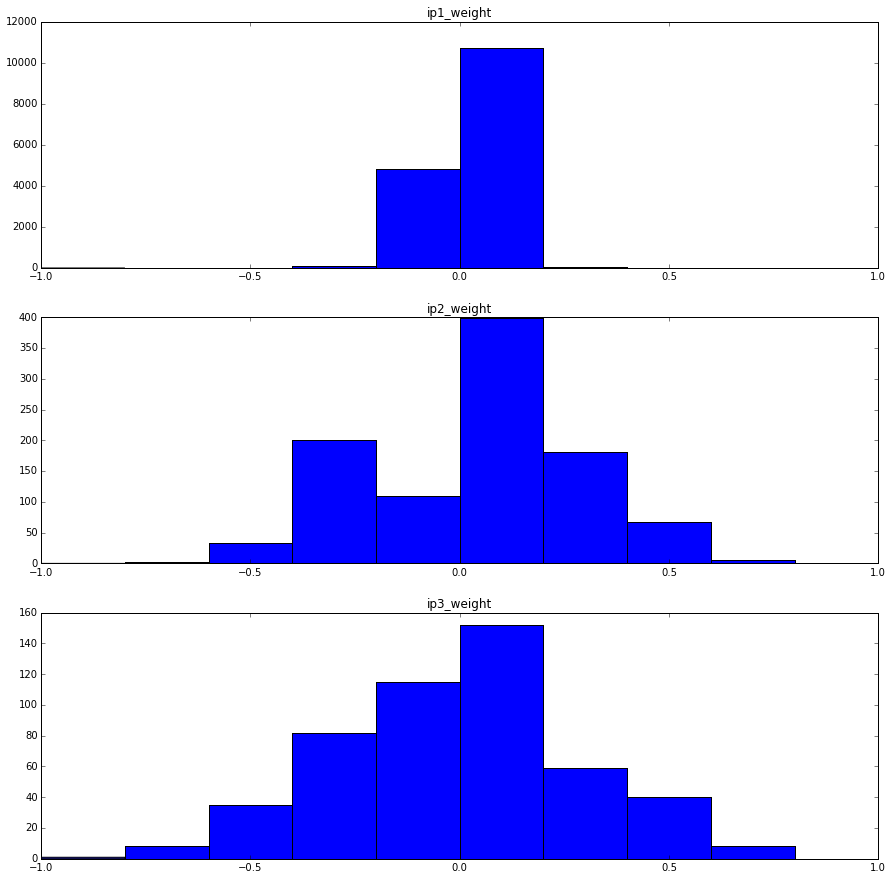

In [60]:
plt.figure(figsize=(15, 15))

feat1 = net1.params['ip1'][0].data
feat2 = net1.params['ip2'][0].data
feat3 = net1.params['ip3'][0].data
#feat4 = train_net.params['ip4'][0].data

plt.subplot(3, 1, 1)
#plt.hist(train_net.params['ip1'][0].data)
plt.hist(feat1.flat, range = [-1, 1])
plt.title("ip1_weight")

#plt.xlabel("weight")
plt.subplot(3, 1, 2)
#plt.hist(train_net.params['ip2'][0].data)
plt.hist(feat2.flat, range = [-1, 1])
plt.title("ip2_weight")

plt.subplot(3, 1, 3)
#plt.hist(train_net.params['ip3'][0].data)
plt.hist(feat3.flat, range = [-1, 1])
plt.title("ip3_weight")

#plt.subplot(2, 2, 4)
#plt.hist(train_net.params['ip4'][0].data)
#plt.hist(feat4)
#plt.title("ip4_weight")

#plt.subplot_tool()
plt.show()

In [62]:
#Neurons of Layer 1
mean_feat1 = [0] * 20
std_feat1 = [0] * 20
posm_feat1 = [0] * 20
negm_feat1 = [0] * 20
poss_feat1 = [0] * 20
negs_feat1 = [0] * 20

for j in range(20):
    mean_feat1[j] = feat1[j].mean()
    std_feat1[j] = feat1[j].std()
    posm_feat1[j] = feat1[j][feat1[j] > 0].mean()
    negm_feat1[j] = feat1[j][feat1[j] < 0].mean()
    poss_feat1[j] = feat1[j][feat1[j] > 0].std()
    negs_feat1[j] = feat1[j][feat1[j] < 0].std()
    
#Neurons of Layer 2
mean_feat2 = [0] * 50
std_feat2 = [0] * 50
posm_feat2 = [0] * 50
negm_feat2 = [0] * 50
poss_feat2 = [0] * 50
negs_feat2 = [0] * 50

for j in range(50):
    mean_feat2[j] = feat2[j].mean()
    std_feat2[j] = feat2[j].std()
    posm_feat2[j] = feat2[j][feat2[j] > 0].mean()
    negm_feat2[j] = feat2[j][feat2[j] < 0].mean()
    poss_feat2[j] = feat2[j][feat2[j] > 0].std()
    negs_feat2[j] = feat2[j][feat2[j] < 0].std()

mean_feat3 = [0] * 10
std_feat3 = [0] * 10
posm_feat3 = [0] * 10
negm_feat3 = [0] * 10
poss_feat3 = [0] * 10
negs_feat3 = [0] * 10

for j in range(10):
    mean_feat3[j] = feat3[j].mean()
    std_feat3[j] = feat3[j].std()
    posm_feat3[j] = feat3[j][feat3[j] > 0].mean()
    negm_feat3[j] = feat3[j][feat3[j] < 0].mean()
    poss_feat3[j] = feat3[j][feat3[j] > 0].std()
    negs_feat3[j] = feat3[j][feat3[j] < 0].std()

In [69]:
%%time
niter = 5000
test_interval = 200
train_loss = zeros(niter)
test_acc = zeros(int(np.ceil(niter / test_interval)))
output = zeros((niter, 8, 10))

for it in range(niter):
    solver.step(1)
    #net1.forward()
    
    train_loss[it] = net1.blobs['loss'].data
    
    net1.forward(start='ip1')
    output[it] = test_net.blobs['ip3'].data[:8]
    
    if it % test_interval == 0:
        print 'iteration', it, 'testing...'
        correct = 0
        for test_it in range(100):
            test_net.forward()
            correct += sum(test_net.blobs['ip3'].data.argmax(1) == test_net.blobs['label'].data)
        test_acc[it // test_interval] = correct / 1e4

iteration 0 testing...
iteration 200 testing...
iteration 400 testing...
iteration 600 testing...
iteration 800 testing...
iteration 1000 testing...
iteration 1200 testing...
iteration 1400 testing...
iteration 1600 testing...
iteration 1800 testing...
iteration 2000 testing...
iteration 2200 testing...
iteration 2400 testing...
iteration 2600 testing...
iteration 2800 testing...
iteration 3000 testing...
iteration 3200 testing...
iteration 3400 testing...
iteration 3600 testing...
iteration 3800 testing...
iteration 4000 testing...
iteration 4200 testing...
iteration 4400 testing...
iteration 4600 testing...
iteration 4800 testing...
CPU times: user 12.3 s, sys: 1.97 s, total: 14.2 s
Wall time: 6.31 s


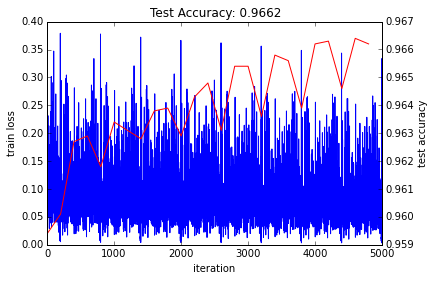

In [70]:
_, ax1 = subplots()
ax2 = ax1.twinx()
ax1.plot(arange(niter), train_loss)
ax2.plot(test_interval * arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_title('Test Accuracy: {:.4f}'.format(test_acc[-1]))

In [ ]:
plt.figure(figsize=(15, 15))

feat1 = net1.params['ip1'][0].data
feat2 = net1.params['ip2'][0].data
feat3 = net1.params['ip3'][0].data
#feat4 = train_net.params['ip4'][0].data

plt.subplot(311)
#plt.hist(train_net.params['ip1'][0].data)
plt.hist(feat1.flat)
plt.title("ip1_weight")

#plt.xlabel("weight")
plt.subplot(312)
#plt.hist(train_net.params['ip2'][0].data)
plt.hist(feat2.flat)
plt.title("ip2_weight")

plt.subplot(313)
#plt.hist(train_net.params['ip3'][0].data)
plt.hist(feat3.flat)
plt.title("ip3_weight")

#plt.subplot(2, 2, 4)
#plt.hist(train_net.params['ip4'][0].data)
#plt.hist(feat4)
#plt.title("ip4_weight")

#plt.subplot_tool()
plt.show()

In [ ]:
std_feat1 = feat1.std()
mean_feat1 = feat1.mean()
posm_feat1 = net1.params['ip1'][0].data[feat1 > 0].mean()
negm_feat1 = net1.params['ip1'][0].data[feat1 < 0].mean()
poss_feat1 = net1.params['ip1'][0].data[feat1 > 0].std()
negs_feat1 = net1.params['ip1'][0].data[feat1 < 0].std()
print "std_feat1 = ", std_feat1
print "mean_feat1 = ", mean_feat1
print "posm_feat1 = ", posm_feat1
print "negm_feat1 = ", negm_feat1
print "poss_feat1 = ", poss_feat1
print "negs_feat1 = ", negs_feat1
std_feat2 = feat2.std()
mean_feat2 = feat2.mean()
posm_feat2 = feat2[feat2 > 0].mean()
negm_feat2 = feat2[feat2 < 0].mean()
poss_feat2 = net1.params['ip2'][0].data[feat2 > 0].std()
negs_feat2 = net1.params['ip2'][0].data[feat2 < 0].std()
print "std_feat2 = ", std_feat2
print "mean_feat2 = ", mean_feat2
print "posm_feat2 = ", posm_feat2
print "negm_feat2 = ", negm_feat2
print "poss_feat2 = ", poss_feat2
print "negs_feat2 = ", negs_feat2
std_feat3 = feat3.std()
mean_feat3 = feat3.mean()
print "std_feat3 = ", std_feat3
print "mean_feat3 = ", mean_feat3

In [ ]:
net1.save('examples/mlp/pruning2.caffemodel')

In [ ]:
for x in range(20):
    for y in range(784):
        if (net1.params['ip1'][0].data[x,y] >= (mean_feat1 - 0.5 * std_feat1)) & (net1.params['ip1'][0].data[x,y] <= (mean_feat1 + 0.5 * std_feat1)):
            net1.params['ip1'][0].data[x,y] = 0
        if (net1.params['ip1'][0].data[x,y] > (mean_feat1 + (0.5 * std_feat1))):
            net1.params['ip1'][0].data[x,y] = posm_feat1
        if (net1.params['ip1'][0].data[x,y] < (mean_feat1 - (0.5 * std_feat1))):
            net1.params['ip1'][0].data[x,y] = negm_feat1
            
for x in range(50):
    for y in range(20):
        if (net1.params['ip2'][0].data[x,y] >= (mean_feat2 - 0.3 * std_feat2)) & (net1.params['ip2'][0].data[x,y] <= (mean_feat2 + 0.3 * std_feat2)):
            net1.params['ip2'][0].data[x,y] = 0
        if (net1.params['ip2'][0].data[x,y] > (mean_feat2 + (0.3 * std_feat2))):
            net1.params['ip2'][0].data[x,y] = posm_feat2
        if (net1.params['ip2'][0].data[x,y] < (mean_feat2 - (0.3 * negs_feat2))):
            net1.params['ip2'][0].data[x,y] = negm_feat2

In [ ]:
test_net.forward()

In [ ]:
(net1.params['ip1'][0].data == 0).sum()

In [ ]:
(net1.params['ip2'][0].data == 0).sum()

In [ ]:
(net1.params['ip3'][0].data == 0).sum()

In [ ]:
(train_net.params['ip4'][0].data == 0).sum()

In [ ]:
train_net.params['ip1'][0].data[train_net.params['ip1'][0].data == 0] = 0
train_net.params['ip1'][0].data[train_net.params['ip1'][0].data > 0] = 1
train_net.params['ip1'][0].data[train_net.params['ip1'][0].data < 0] = -1

In [ ]:
plt.hist(train_net.params['ip1'][0].data)
plt.title("ip1_weight")
plt.xlabel("weight")
plt.show()

In [ ]:
test_net.forward()

In [ ]:
%%time
niter = 1000
test_interval = 50
train_loss = zeros(niter)
test_acc = zeros(int(np.ceil(niter / test_interval)))
output = zeros((niter, 8, 10))

#for it in range(niter):
    #solver.step(1)
    
    #train_loss[it] = train_net.blobs['loss'].data
        
    #test_net.forward(1)
    #output[it] = test_net.blobs['ip4'].data[:8]
        
    #if it % test_interval == 0:
print 'iteration', it, 'testing...'
correct = 0
for test_it in range(100):
    test_net.forward()
    correct += sum(test_net.blobs['ip4'].data.argmax(1) == test_net.blobs['label'].data)
test_acc[it // test_interval] = correct / 1e4

In [ ]:
test_net.forward()

In [ ]:
fig = plt.figure()

plt.subplot(221)
plt.hist(train_net.params['ip1'][0].data)
plt.title("ip1_weight")
#plt.xlabel("weight")
plt.subplot(222)
plt.hist(train_net.params['ip2'][0].data)
plt.title("ip2_weight")
plt.subplot(223)
plt.hist(train_net.params['ip3'][0].data)
plt.title("ip3_weight")
plt.subplot(224)
plt.hist(train_net.params['ip4'][0].data)
plt.title("ip4_weight")

#plt.subplot_tool()
plt.show()